# Shallow Neural Network in PyTorch

In this notebook, we adapt our TensorFlow Shallow Net to PyTorch.

**Load dependencies**

In [3]:
import torch
import torch.nn as nn

from torchvision.datasets import MNIST
from torchvision import transforms

from torchsummary import summary

import matplotlib.pyplot as plt

**Load Data**

In [4]:
train = MNIST('data', train=True, transform=transforms.ToTensor(), download=True)
test = MNIST('data', train=False, transform=transforms.ToTensor())
# ... toTensor() converts the images to PyTorch tensors
# ... and normalizes them to the range [0, 1]

100.0%
100.0%
100.0%
100.0%


In [5]:
train.data.shape

torch.Size([60000, 28, 28])

In [6]:
train.data[0] # not scaled!

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

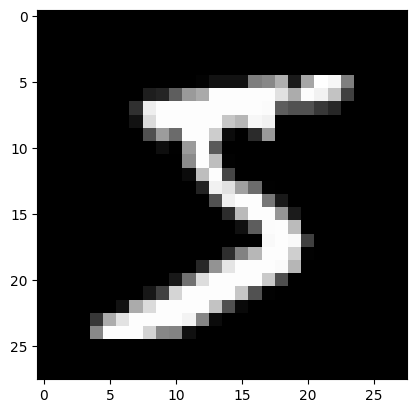

In [7]:
_ = plt.imshow(train.data[0].numpy().squeeze(), cmap='gray') # squeeze() removes the single-dimensional entries from the shape of the array

In [8]:
train.targets[0:100] # targets are the labels of the images

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7,
        1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0,
        7, 8, 3, 1])

In [9]:
train.targets.shape

torch.Size([60000])

In [10]:
test.data.shape

torch.Size([10000, 28, 28])

In [11]:
test.targets.shape

torch.Size([10000])

**Batch data**

In [12]:
train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=False)
# ...DataLoader creates an iterable over the dataset, allowing us to iterate over the data in batches

In [13]:
X_sample, y_sample = next(iter(train_loader))

In [14]:
X_sample.shape

torch.Size([64, 1, 28, 28])

In [15]:
y_sample.shape

torch.Size([64])

In [16]:
y_sample

tensor([5, 7, 0, 7, 8, 7, 1, 4, 6, 1, 1, 2, 0, 9, 7, 6, 7, 2, 8, 7, 8, 1, 7, 6,
        2, 4, 9, 9, 4, 9, 6, 9, 6, 7, 1, 8, 3, 6, 3, 4, 7, 9, 1, 3, 6, 3, 1, 3,
        1, 6, 1, 2, 5, 2, 5, 3, 4, 3, 8, 9, 6, 1, 6, 6])

In [17]:
X_sample[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [18]:
X_flat_sample = X_sample.view(X_sample.shape[0], -1) # view() reshapes the tensor to a 2D tensor with shape (batch_size, num_features)

In [19]:
X_flat_sample.shape

torch.Size([64, 784])

In [20]:
X_flat_sample[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

**Design neural network architecture**

In [21]:
n_input = 784
n_dense = 64
n_out = 10

In [22]:
model = nn.Sequential(
    nn.Linear(n_input, n_dense),  # hidden layer with input size n_input and output size n_dense
    nn.Sigmoid(),  # Activation function
    nn.Linear(n_dense, n_out)  # Fully connected layer with input size n_dense and output size n_out
)

In [23]:
summary(model, (1, n_input))  # i is the batch size, n_input is the number of features

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]          50,240
           Sigmoid-2                [-1, 1, 64]               0
            Linear-3                [-1, 1, 10]             650
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.19
Estimated Total Size (MB): 0.20
----------------------------------------------------------------


**Configure training hyperparameters**

In [24]:
cost_fxn = nn.CrossEntropyLoss()  # CrossEntropyLoss combines softmax and negative log-likelihood loss in one function

In [25]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Adam optimizer with learning rate 0.001

**Train**

In [ ]:
def accuracy_pct(pred_y, true_y):
    _, prediction = torch.max(pred_y, 1) # returns the maximum value and the index of the maximum value along the specified dimension
    correct = (prediction == true_y).sum().item() # counts the number of correct predictions
    return (correct / true_y.shape[0]) * 100  # returns the accuracy in percentage

In [27]:
n_batches = len(train_loader)
n_batches

938

In [29]:
num_epochs = 20

print(f"Training for {num_epochs} epochs.\n")

for epoch in range(num_epochs):
    
    avg_cost = 0.0
    avg_accuracy = 0.0
    
    for i, (X, y) in enumerate(train_loader): #enumerate() returns the index and the value of the iterable
        
        # Forward Porgagation
        X_flat = X.view(X.shape[0], -1)  # flatten the input
        pred_y = model(X_flat) # forward pass through the model
        cost = cost_fxn(pred_y, y) # compute the loss
        avg_cost += cost/n_batches # accumulate the average cost
        
        # Backward Propagation and Optimization via gradiebnt descent
        optimizer.zero_grad() # zero the gradients before the backward pass
        cost.backward() # compute the gradients
        optimizer.step() # update the weights
        
        # Calculate accuracy
        accuracy = accuracy_pct(pred_y, y) # compute the accuracy
        avg_accuracy += accuracy/n_batches # accumulate the average accuracy
        
        if(i+1) % 100 == 0:
            print('Epoch {}/{} complete. Cost: {:.3f}, Accuracy: {:.1f}% \n'.format(epoch + 1, num_epochs, avg_cost, avg_accuracy))
            
print("Traing completed.")       

Training for 20 epochs.

Epoch 1/20 complete. Cost: 0.241, Accuracy: 2.5% 

Epoch 1/20 complete. Cost: 0.480, Accuracy: 5.6% 

Epoch 1/20 complete. Cost: 0.715, Accuracy: 9.6% 

Epoch 1/20 complete. Cost: 0.947, Accuracy: 15.4% 

Epoch 1/20 complete. Cost: 1.175, Accuracy: 20.9% 

Epoch 1/20 complete. Cost: 1.400, Accuracy: 26.6% 

Epoch 1/20 complete. Cost: 1.619, Accuracy: 32.9% 

Epoch 1/20 complete. Cost: 1.834, Accuracy: 39.3% 

Epoch 1/20 complete. Cost: 2.044, Accuracy: 45.8% 

Epoch 2/20 complete. Cost: 0.200, Accuracy: 6.9% 

Epoch 2/20 complete. Cost: 0.395, Accuracy: 13.7% 

Epoch 2/20 complete. Cost: 0.583, Accuracy: 20.7% 

Epoch 2/20 complete. Cost: 0.763, Accuracy: 27.9% 

Epoch 2/20 complete. Cost: 0.936, Accuracy: 35.0% 

Epoch 2/20 complete. Cost: 1.103, Accuracy: 42.2% 

Epoch 2/20 complete. Cost: 1.264, Accuracy: 49.6% 

Epoch 2/20 complete. Cost: 1.419, Accuracy: 57.0% 

Epoch 2/20 complete. Cost: 1.567, Accuracy: 64.6% 

Epoch 3/20 complete. Cost: 0.140, Accuracy:

**Test Model**

In [30]:
n_test_batches = len(test_loader)
n_test_batches

157

In [32]:
model.eval()  # set the model to evaluation mode

with torch.no_grad():  # no need to compute gradients during evaluation
    
    avg_test_cost = 0.0
    avg_test_accuracy = 0.0
    
    for X,y in test_loader:
        
        # Make predictions
        X_flat = X.view(X.shape[0], -1)
        pred_y = model(X_flat)
        
        # Calculate cost
        cost = cost_fxn(pred_y, y)
        avg_test_cost += cost/n_test_batches
        
        # Calculate accuracy
        test_accuracy = accuracy_pct(pred_y, y)
        avg_test_accuracy += test_accuracy/n_test_batches
        
    print('Test Cost: {:.3f}, Test Accuracy: {:.1f}%'.format(avg_test_cost, avg_test_accuracy))
    
# model.train() unodoes the eval() mode and sets the model back to training mode

Test Cost: 0.321, Test Accuracy: 91.1%
